### Implementing Quantile loss 

$L_q(y_i, \mathbf{f}_i) = \sum_{i=y_i < \mathbf{f}_i} (1-q)|y_i - \mathbf{f}_i | + \sum_{i=y_i \ge \mathbf{f}_i} (q)|y_i - \mathbf{f}_i | $

$\qquad \qquad  = \sum_{i}\text{max}(q(y_i - f_i), (1-q)(f_i - y_i))$

$\qquad \qquad  = \sum_{i}\text{max}(q.\epsilon_i, (q-1)(\epsilon_i)) \qquad \qquad \text{where } \epsilon_{i}=y_i-f_i $

$\qquad \qquad  = \sum_{i}( q.\epsilon_i + \text{max}(0, -\epsilon_i))$

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def quantile_loss(q,y,f):
    e = (y-f)
    return tf.keras.backend.mean(q*e + tf.keras.backend.clip(-e,tf.keras.backend.epsilon(),np.inf),axis=-1)

### Check tf functions

In [19]:
x = tf.random.uniform((10,1),-10,10)
x

<tf.Tensor: id=87, shape=(10, 1), dtype=float32, numpy=
array([[ 2.7591248],
       [-5.0407386],
       [-0.441823 ],
       [ 9.208778 ],
       [-7.3465323],
       [ 3.432355 ],
       [-9.491777 ],
       [ 7.791157 ],
       [-7.6454353],
       [ 7.7363243]], dtype=float32)>

In [62]:
## max reduces to maximum value ina tensor. IF we dont use clip, then we have to loop over the tensor
c = tf.keras.backend.clip(x,0,np.inf) 
c

<tf.Tensor: id=198, shape=(10, 1), dtype=float32, numpy=
array([[2.7591248],
       [0.       ],
       [0.       ],
       [9.208778 ],
       [0.       ],
       [3.432355 ],
       [0.       ],
       [7.791157 ],
       [0.       ],
       [7.7363243]], dtype=float32)>

In [84]:
tf.keras.backend.mean(c,axis=-1)

<tf.Tensor: id=387, shape=(10,), dtype=float32, numpy=
array([2.7591248, 0.       , 0.       , 9.208778 , 0.       , 3.432355 ,
       0.       , 7.791157 , 0.       , 7.7363243], dtype=float32)>

In [24]:
tf.keras.backend.epsilon()

1e-07

### Check loss fn

In [51]:
y = tf.constant(np.linspace(-100,100,100,dtype="float64")[...,np.newaxis])
f = tf.constant(np.zeros(100,dtype="float64")[...,np.newaxis])

In [69]:
loss = quantile_loss(0.9,y,f)
loss

<tf.Tensor: id=314, shape=(100,), dtype=float64, numpy=
array([10.        ,  9.7979798 ,  9.5959596 ,  9.39393939,  9.19191919,
        8.98989899,  8.78787879,  8.58585859,  8.38383838,  8.18181818,
        7.97979798,  7.77777778,  7.57575758,  7.37373737,  7.17171717,
        6.96969697,  6.76767677,  6.56565657,  6.36363636,  6.16161616,
        5.95959596,  5.75757576,  5.55555556,  5.35353535,  5.15151515,
        4.94949495,  4.74747475,  4.54545455,  4.34343434,  4.14141414,
        3.93939394,  3.73737374,  3.53535354,  3.33333333,  3.13131313,
        2.92929293,  2.72727273,  2.52525253,  2.32323232,  2.12121212,
        1.91919192,  1.71717172,  1.51515152,  1.31313131,  1.11111111,
        0.90909091,  0.70707071,  0.50505051,  0.3030303 ,  0.1010101 ,
        0.90909101,  2.72727283,  4.54545465,  6.36363646,  8.18181828,
       10.0000001 , 11.81818192, 13.63636374, 15.45454555, 17.27272737,
       19.09090919, 20.90909101, 22.72727283, 24.54545465, 26.36363646,
       2

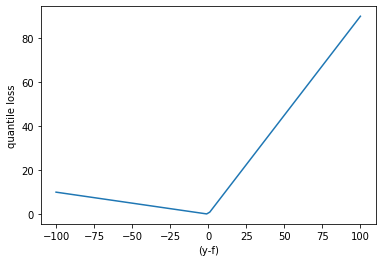

In [70]:
plt.xlabel("(y-f)")
plt.ylabel("quantile loss")
plt.plot(y,loss.numpy())

In [90]:
mse = tf.keras.losses.MeanSquaredError()(y,f)

In [91]:
mse

<tf.Tensor: id=459, shape=(), dtype=float64, numpy=3400.67333984375>

### Multi Quantile loss

In [33]:
y = tf.random.uniform((10,1),-10,10)
f = tf.random.uniform((10,3),-10,10)

In [34]:
y-f

<tf.Tensor: id=369, shape=(10, 3), dtype=float32, numpy=
array([[ 12.513569 ,  15.814415 ,   9.910007 ],
       [ -9.485546 ,  -8.4739685, -11.151321 ],
       [  4.5881243,  16.832542 ,  -1.1507416],
       [ -4.6388106,  -3.1358905,   0.4215908],
       [ -9.208505 , -16.732971 , -12.769585 ],
       [-11.414921 , -11.249432 ,  -3.7999697],
       [  2.905562 ,   5.0920367,  -7.3588877],
       [-14.016509 , -11.849904 , -11.656682 ],
       [ -1.9355755,  -2.4663696,  -3.1988144],
       [  2.873928 ,   8.904293 ,   5.684784 ]], dtype=float32)>

In [20]:
def multi_quantile_loss(quantiles,y,f):
    e = (y-f)
    loss = 0
    for k in range(len(quantiles)):
        q = quantiles[k]
        #loss += tf.keras.backend.mean(q*e[:,k] + tf.keras.backend.clip(-e[:,k],tf.keras.backend.epsilon(),np.inf),axis=-1)
        loss += q*e[:,k] + tf.keras.backend.clip(-e[:,k],tf.keras.backend.epsilon(),np.inf)
    return loss

In [21]:
y = tf.constant(np.linspace(-100,100,100,dtype="float64")[...,np.newaxis])
f = tf.constant(np.zeros((100,3),dtype="float64"))

In [28]:
loss = multi_quantile_loss([0.9,0.8,0.7],y,f)

In [29]:
loss

<tf.Tensor: id=315, shape=(100,), dtype=float64, numpy=
array([ 60.        ,  58.78787879,  57.57575758,  56.36363636,
        55.15151515,  53.93939394,  52.72727273,  51.51515152,
        50.3030303 ,  49.09090909,  47.87878788,  46.66666667,
        45.45454545,  44.24242424,  43.03030303,  41.81818182,
        40.60606061,  39.39393939,  38.18181818,  36.96969697,
        35.75757576,  34.54545455,  33.33333333,  32.12121212,
        30.90909091,  29.6969697 ,  28.48484848,  27.27272727,
        26.06060606,  24.84848485,  23.63636364,  22.42424242,
        21.21212121,  20.        ,  18.78787879,  17.57575758,
        16.36363636,  15.15151515,  13.93939394,  12.72727273,
        11.51515152,  10.3030303 ,   9.09090909,   7.87878788,
         6.66666667,   5.45454545,   4.24242424,   3.03030303,
         1.81818182,   0.60606061,   2.42424272,   7.27272757,
        12.12121242,  16.96969727,  21.81818212,  26.66666697,
        31.51515182,  36.36363666,  41.21212151,  46.06060636,

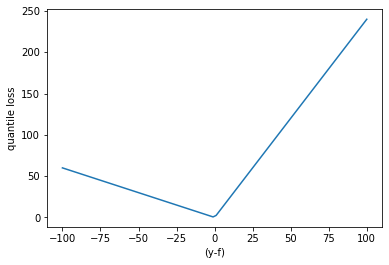

In [30]:
plt.xlabel("(y-f)")
plt.ylabel("quantile loss")
plt.plot(y,loss.numpy())